In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета

In [2]:
df = pd.read_csv('Base.csv')

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
print(df.columns)
print(df.shape)

In [ ]:
df.isnull().sum()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 0 to 664395
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        22058 non-null  int64  
 1   income                            22058 non-null  float64
 2   name_email_similarity             22058 non-null  float64
 3   prev_address_months_count         22058 non-null  int64  
 4   current_address_months_count      22058 non-null  int64  
 5   customer_age                      22058 non-null  int64  
 6   days_since_request                22058 non-null  float64
 7   intended_balcon_amount            22058 non-null  float64
 8   payment_type                      22058 non-null  object 
 9   zip_count_4w                      22058 non-null  int64  
 10  velocity_6h                       22058 non-null  float64
 11  velocity_24h                      22058 non-null  float64
 12  velocity

In [8]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,2.205800e+04,22058.000000,22058.000000,22058.000000,...,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,22058.000000,22058.0,22058.000000
mean,0.500000,0.616479,0.436696,12.363587,100.380180,37.141627,8.901762e-01,7.220470,1890.424291,6296.715877,...,0.873243,11.324508,0.127709,710.762988,0.046378,8.204480,0.509883,1.052543,0.0,1.782981
std,0.500011,0.285138,0.294771,41.018249,89.480767,13.262821,5.015005e+00,19.521490,1203.358665,3159.692361,...,0.332708,12.338487,0.333773,611.349284,0.210307,9.147447,0.499914,0.265782,0.0,2.419059
min,0.000000,0.100000,0.000132,-1.000000,-1.000000,10.000000,4.036860e-09,-9.761944,6.000000,64.422571,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.400000,0.156276,-1.000000,34.000000,30.000000,6.333558e-03,-1.201217,1018.000000,3876.193687,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.374378,0.000000,1.000000,0.0,0.000000
50%,0.500000,0.700000,0.417876,-1.000000,71.000000,40.000000,1.373238e-02,-0.866962,1524.000000,6367.166296,...,1.000000,5.000000,0.000000,500.000000,0.000000,5.250571,1.000000,1.000000,0.0,0.000000
75%,1.000000,0.900000,0.711504,-1.000000,149.000000,50.000000,2.425576e-02,-0.362394,2464.000000,8320.613511,...,1.000000,25.000000,0.000000,1500.000000,0.000000,8.829006,1.000000,1.000000,0.0,4.000000
max,1.000000,0.900000,0.999999,364.000000,410.000000,90.000000,7.549592e+01,111.685268,6700.000000,16715.565404,...,1.000000,31.000000,1.000000,2100.000000,1.000000,77.730242,1.000000,2.000000,0.0,7.000000


fraud_bool
0    988971
1     11029
Name: count, dtype: int64


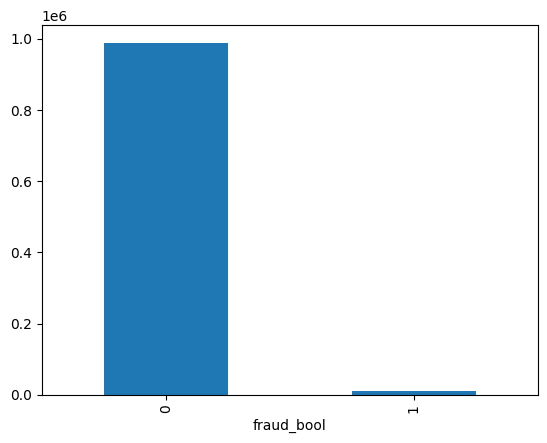

In [4]:
df['fraud_bool'].value_counts().plot.bar()
print(df['fraud_bool'].value_counts())

# Чтобы уровнять количество переменных, в данном случае берутся первые 11029 строк отрицательной переменной, в чистовом варианте будет использоваться метод кластерных центроидов, с помощью которого создадутся синтетические записи, которые будут отражать все характеристики бОльшей переменной, при этом занимая количество как меньшая 

In [5]:
sorted_df = df.sort_values('fraud_bool', ascending=False)

# Keep the top 22057 rows in the dataset
df = sorted_df.head(22058)

fraud_bool
1    11029
0    11029
Name: count, dtype: int64


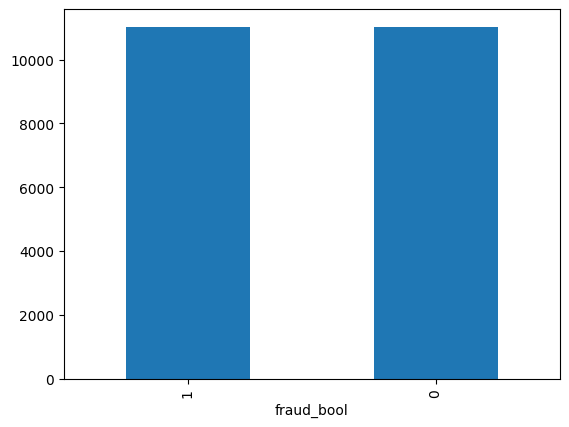

In [6]:
df['fraud_bool'].value_counts().plot.bar()
print(df['fraud_bool'].value_counts())

# Кодировка категориальных признаков

payment_type
AB    7906
AC    5709
AA    4841
AD    3597
AE       5
Name: count, dtype: int64


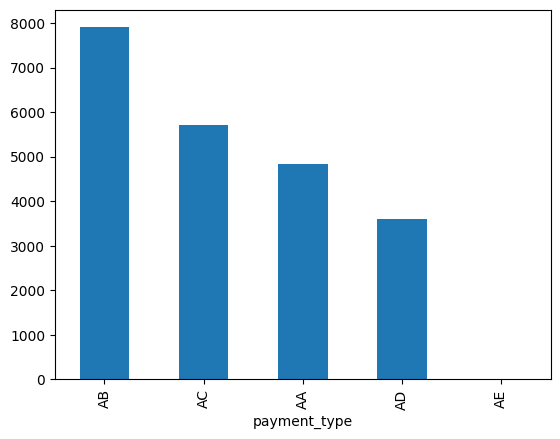

In [9]:
df['payment_type'].value_counts().plot.bar()
print(df.payment_type .value_counts())

In [10]:
encode = {'AA': 1, 'AB': 2, 'AC': 3, 'AD': 4, 'AE': 5}

df['payment_type'] = df['payment_type'].map(encode)

employment_status
CA    16117
CB     3381
CC     1288
CF      594
CD      410
CE      259
CG        9
Name: count, dtype: int64


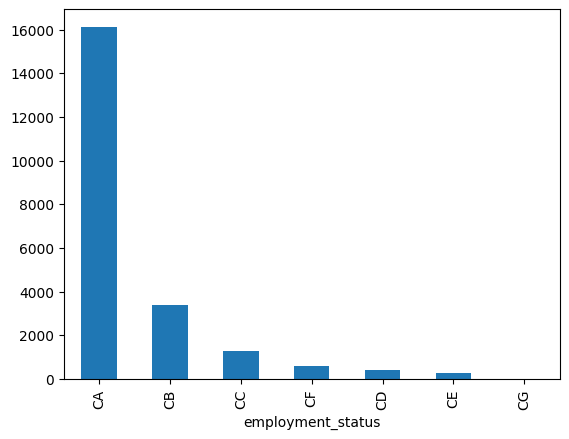

In [11]:
df['employment_status'].value_counts().plot.bar()
print(df.employment_status.value_counts())

In [12]:
encode = {'CA': 1, 'CB': 2, 'CC': 3, 'CD': 4, 'CE': 5, 'CF': 6, 'CG': 7}

df['employment_status'] = df['employment_status'].map(encode)

employment_status
1    16117
2     3381
3     1288
6      594
4      410
5      259
7        9
Name: count, dtype: int64


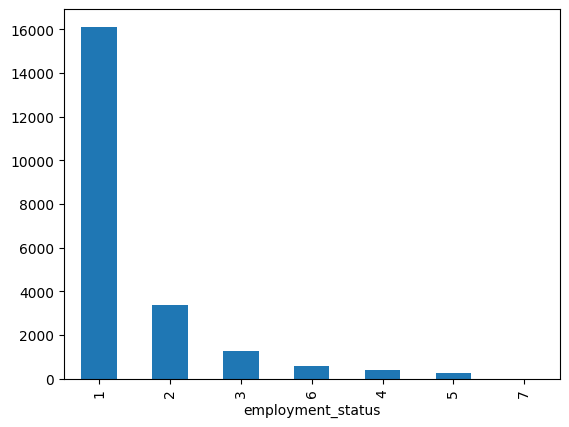

In [13]:
df['employment_status'].value_counts().plot.bar()
print(df.employment_status.value_counts())

housing_status
BA    8181
BC    6936
BB    3504
BE    2839
BD     564
BF      28
BG       6
Name: count, dtype: int64


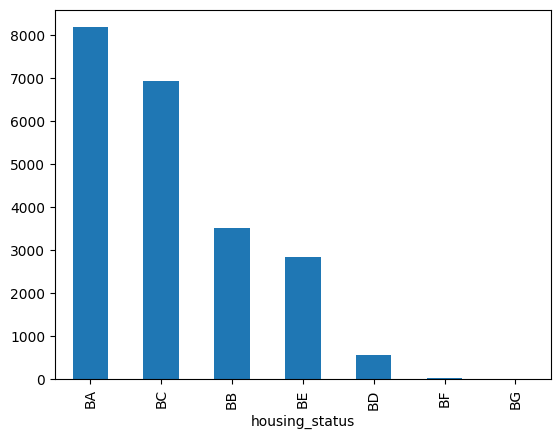

In [14]:
df['housing_status'].value_counts().plot.bar()
print(df.housing_status.value_counts())

In [15]:
encode = {'BA': 1, 'BB': 2, 'BC': 3, 'BD': 4, 'BE': 5, 'BF': 6, 'BG': 7}

df['housing_status'] = df['housing_status'].map(encode)

source
INTERNET    21890
TELEAPP       168
Name: count, dtype: int64


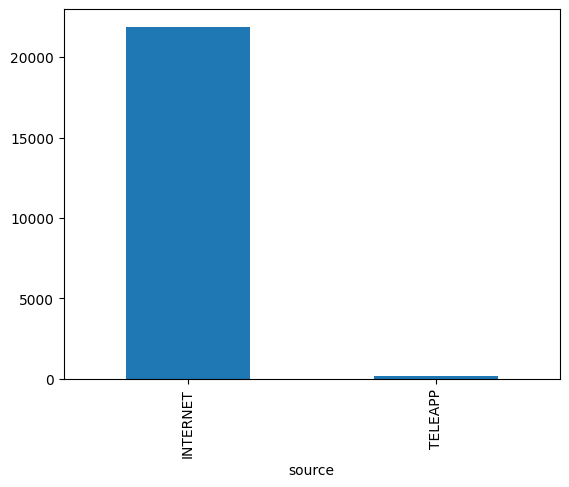

In [16]:
df['source'].value_counts().plot.bar()
print(df.source.value_counts())

In [17]:
encode = {'INTERNET': 1, 'TELEAPP': 2}

df['source'] = df['source'].map(encode)

device_os
windows      9135
other        6225
linux        5297
macintosh    1213
x11           188
Name: count, dtype: int64


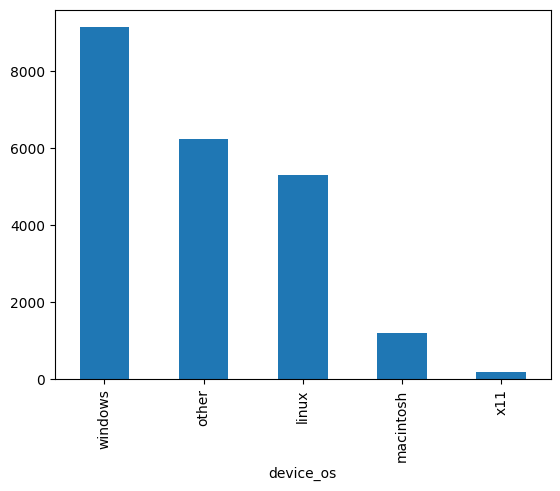

In [18]:
df['device_os'].value_counts().plot.bar()
print(df.device_os.value_counts())

In [19]:
encode = {'other': 1, 'linux': 2, 'windows': 3, 'macintosh': 4, 'x11': 5}

df['device_os'] = df['device_os'].map(encode)

device_os
3    9135
1    6225
2    5297
4    1213
5     188
Name: count, dtype: int64


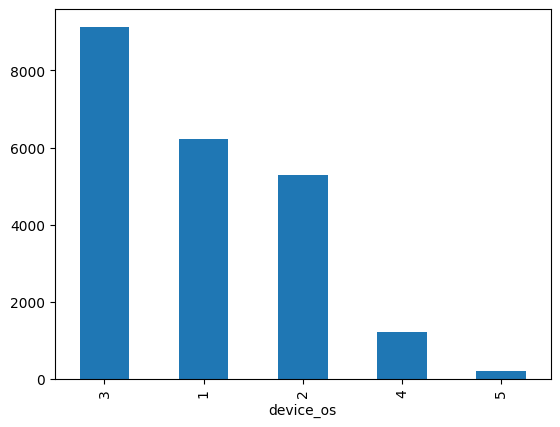

In [20]:
df['device_os'].value_counts().plot.bar()
print(df.device_os.value_counts())

# Корреляция

In [21]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,1,769,...,0,500.0,0,1,3.888115,3,0,1,0,7
513443,1,0.8,0.663250,-1,102,40,0.035927,-1.227818,4,676,...,0,200.0,0,1,6.905076,3,1,1,0,6
513419,1,0.5,0.178321,-1,100,40,0.041472,-1.680490,2,1248,...,0,500.0,0,1,53.165532,3,0,1,0,6
513420,1,0.7,0.683619,-1,85,20,0.004322,52.347203,2,2690,...,0,200.0,0,1,5.329454,4,0,1,0,6
513421,1,0.9,0.797448,-1,123,40,0.007896,-1.293703,3,517,...,0,200.0,0,1,2.181067,3,0,1,0,6


<Axes: >

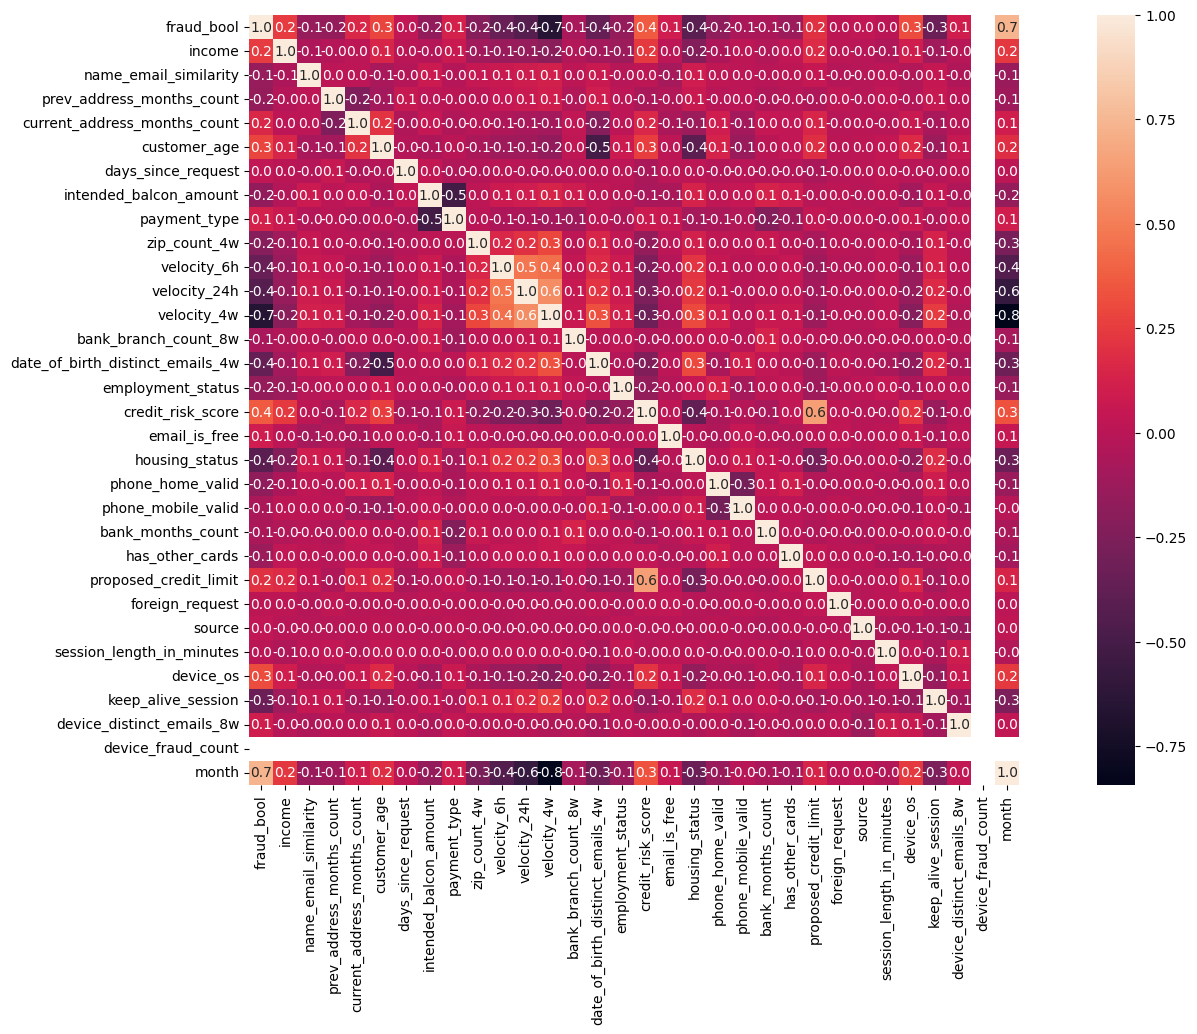

In [22]:
correlation = df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )

income                              0.246047
name_email_similarity              -0.147693
prev_address_months_count          -0.158524
current_address_months_count        0.161167
customer_age                        0.280265
days_since_request                  0.032790
intended_balcon_amount             -0.166920
payment_type                        0.125353
zip_count_4w                       -0.222809
velocity_6h                        -0.352195
velocity_24h                       -0.431568
velocity_4w                        -0.657343
bank_branch_count_8w               -0.074779
date_of_birth_distinct_emails_4w   -0.355570
employment_status                  -0.153194
credit_risk_score                   0.364189
email_is_free                       0.098846
housing_status                     -0.410230
phone_home_valid                   -0.173747
phone_mobile_valid                 -0.068132
bank_months_count                  -0.069291
has_other_cards                    -0.129717
proposed_c

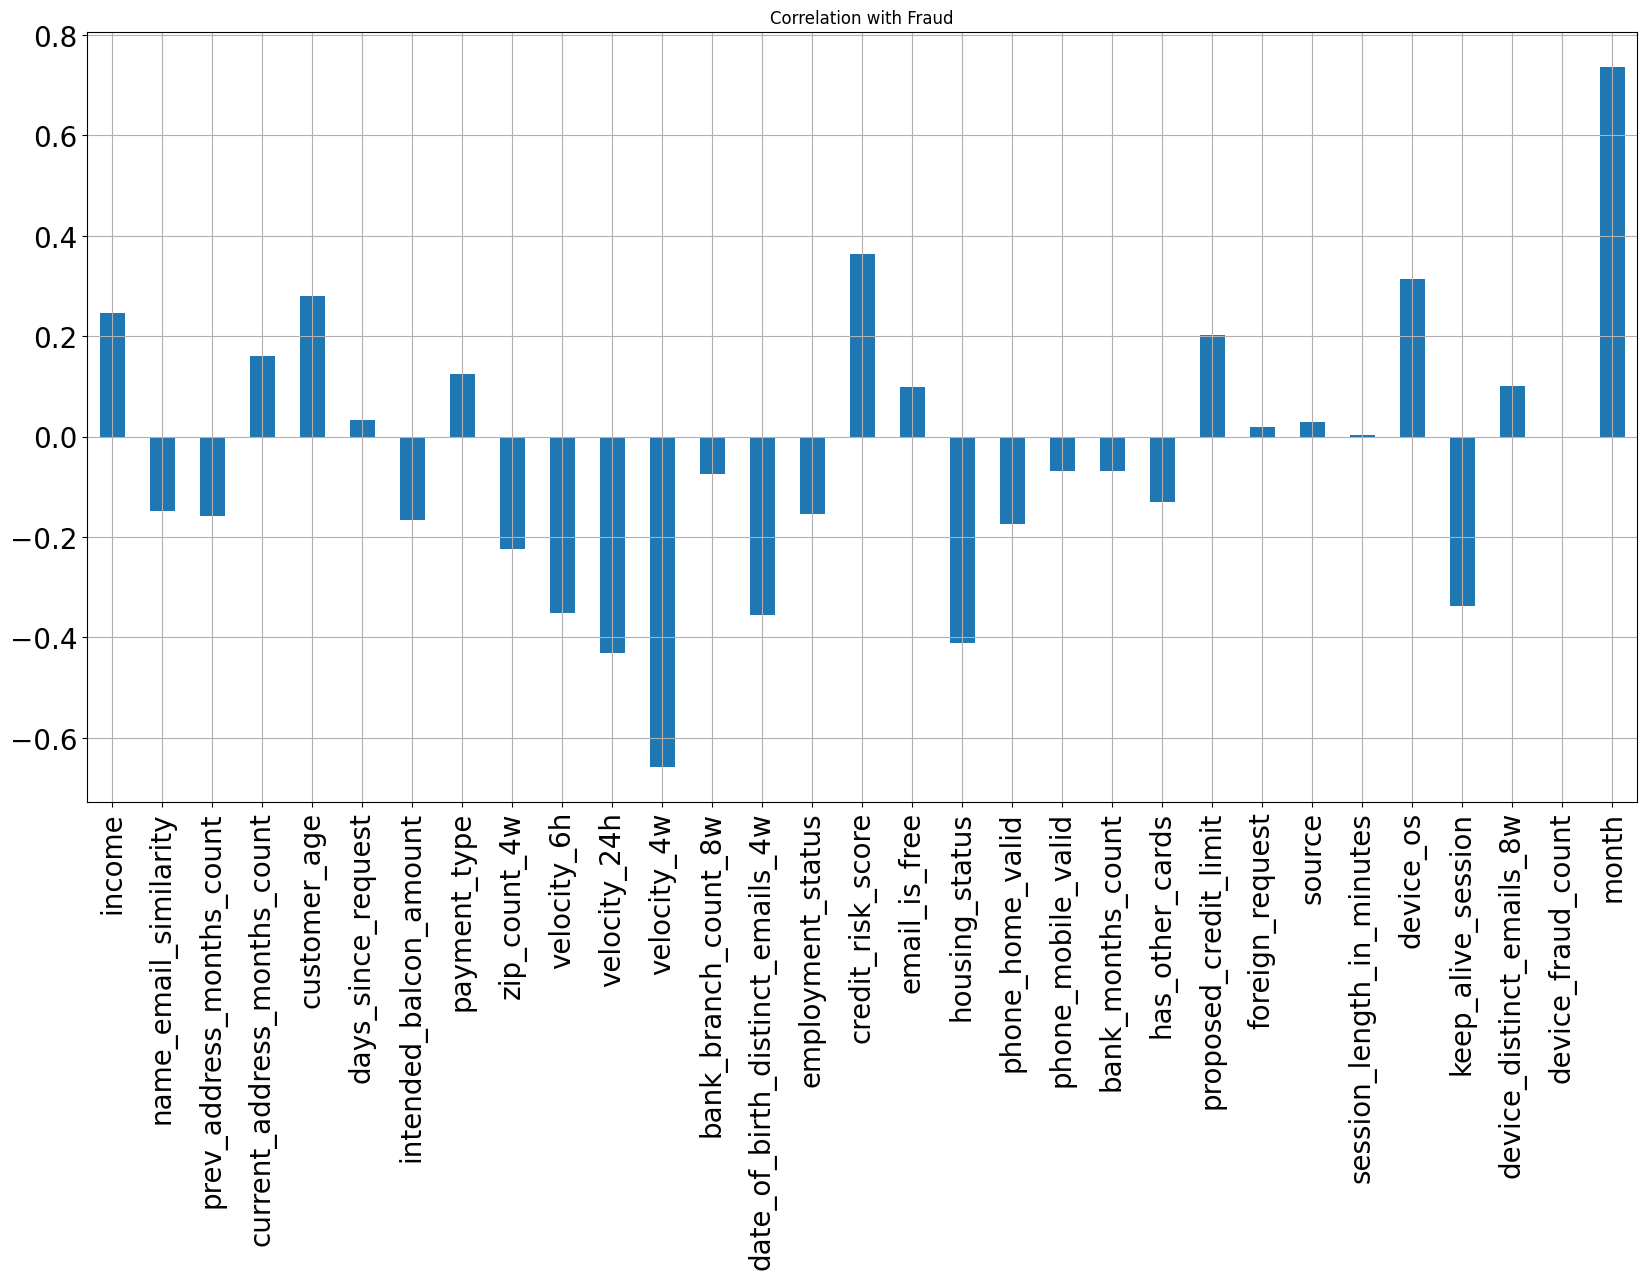

In [23]:
X = df.drop(['fraud_bool'],axis=1)
X.corrwith(df['fraud_bool']).plot.bar(figsize = (20, 10), title = "Correlation with Fraud", 
                                        fontsize = 20,rot = 90, grid = True)
print(X.corrwith(df['fraud_bool']))

# Обучение

In [24]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y, random_state = 42)

In [26]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print(f"Классы в y_train:\n{y_train}")
print(f"Классы в y_test:\n{y_test}")

Количество строк в y_train по классам: [7720 7720]
Количество строк в y_test по классам: [3309 3309]
Классы в y_train:
[0 1 1 ... 1 0 0]
Классы в y_test:
[1 1 0 ... 0 1 1]


In [ ]:
print(X_test)

# Используется GridSearch, в чистовом варианте планируется использовать Optuna для подгона моделей под заданные метрики

## Предлагаемые авторами датасета метрики, на которые следует опираться, пока что в работе не используется

![Metrics](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3349776%2Faf502caf5b9e370b869b85c9d4642c5c%2FScreenshot%20from%202022-12-15%2015-17-59.png?generation=1671117525527314&alt=media)



## Перевод текста с картинки
Результативность: Отзывчивость (Recall) при 5% FPR(ложноположительных ответов)

Мошенничество - это задача с сильным дисбалансом классов (примерно 1% мошеннических меток), поэтомAccuracy, у точнос,ть не является адекватной метрикой оценки. Классификатор с постоянным отрицательным классом мог бы достичь свыше 98% точности, но не смог бы предсказать никакого мошенничества.Ошу оа основываетсяенку на метриках кривой RRecall (OC: отзывчив)ость (TPR) и ложные срабатывания (FPЗуем значения м ограничиваютсяодели, чтобы получить целевой показатель FPR, в данном слиспользуетсяьзуем 5% уровень ложных срабатываний для бинаризации предсказаний модели.

Справедливость: Предсказательное равенство (баланс FPR)

В качестве метрики справеизмеряется измеряам разницу (или отношение) FPR между защищенными группами в наборе данных, используя пороги, которые позволяют достичь 5% FPR Э выбрали атвыбирается у метрику из-за карательного характера сценария классификации: ложное срабатывание соответствует отказу в банковском счете законному заявителю (с последующим социальным воздействием), в то время как ложное отрицание приводит в основном к потерям банка.

Мы понимаем, что метрики справедливости являются предметом дебатов, и призываем других специалистов экспериментировать с другими метриками справедливости.

## Обучение модели на основе алгоритма случайного леса

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)

In [28]:
%%time
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],'min_samples_split': np.arange(2,5,1), 'n_estimators':np.arange(50,150,25)}
grid_search = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: total: 3 s
Wall time: 35.5 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([ 50,  75, 100, 125])})

In [29]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=50, random_state=42)
0.9410619659205522


In [30]:
y_pred = grid_search.predict(X_test)

In [33]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

RFCresults = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

RFCresults

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.938199,0.987887,0.887277,0.934883,0.938199


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

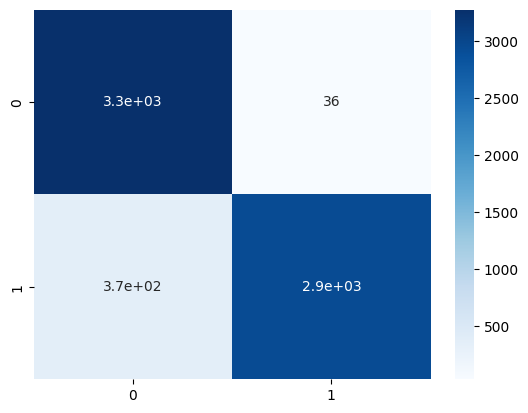

In [32]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

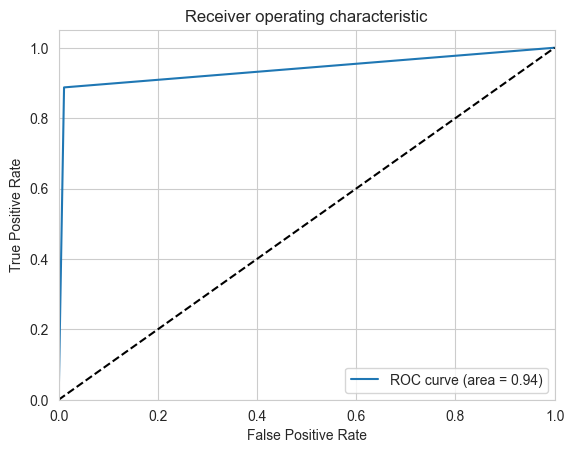

[0.         0.01087942 1.        ] [0.         0.88727712 1.        ]


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

print(fpr, tpr)

In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, grid_search.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3309
           1       0.99      0.89      0.93      3309

    accuracy                           0.94      6618
   macro avg       0.94      0.94      0.94      6618
weighted avg       0.94      0.94      0.94      6618



# Полученные метрики являются высокими, модель обучена качественно и хорошо определяет классы